# Author : Eslam Mohamed
# Numerical Algorithms 
# Second Order Optimization
# Date : 20/05/2022

## Secant Method
- Implement the <b>Secant method</b> as a function and solve the following equation:
    - $𝒇(𝒙)=𝒙^𝟑−𝒙^𝟐−𝟏𝟓𝒙+𝟏$,          𝒙_𝟎=𝟒.𝟓
- Draw the functions and check out the roots.
- Try your function with different initialization and check out the results.
- Compare the results with the one from Newton's method.

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
# Secant Function

def f(x):
    fx = np.power(x,3) - np.power(x,2) - 15 * x + 1
    
    return fx

def secant(x0,x1,e):
    i = 0
    while True:
        
        xnew = x1 - (f(x1) * ((x1 - x0)/(f(x1) - f(x0))))
        # Approximated first derivative
        x0 = x1
        x1 = xnew
        i += 1 
        if np.abs(f(xnew))< e:
            print(f"Solution found after {i} iteration")
            print(f"r={xnew}")
            print(f"f(r1) = {f(xnew)}")
            break
    return xnew


In [7]:
result = secant(4.5,5.5,1e-8)

Solution found after 5 iteration
r=4.375753855704598
f(r1) = 1.1000764743585023e-09


# Newton Method

In [8]:

# First Derivative function 
def f_dash(x):
    fx = 3 * np.power(x,2) - 2 * x - 15
    return fx

# Newton Method
def newton(x0,e):
    i = 0
    while True:
        
        xnew = x0 - (f(x0) / f_dash(x0))
        x0 = xnew
        i += 1
        if np.abs(f(xnew))< e:
            print(f"Solution found after {i} iteration")
            print(f"r={xnew}")
            print(f"f(r1) = {f(xnew)}")
            break
    return xnew

In [9]:
result = newton(4.5,e=1e-8)

Solution found after 3 iteration
r=4.375753855705814
f(r1) = 1.1410321576477145e-09


# Hint : Newton is faster than secant because it use the actual first derivative information about the function not APROXIMATED one as in Secant
## Let's continue and see the effect when use second order 

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

# Finding the minimum of the function, consider it a cost function and you want to find the Local minimum or Global if it's "Convex" of the function.
## That means you need to find the root at the first derivative of the function F'

In [11]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

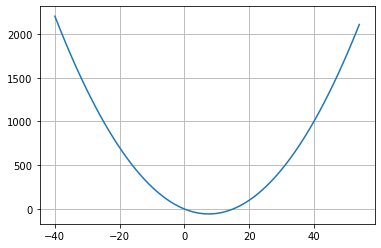

In [21]:
x = np.arange(-40,55)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.grid()

# plt.xlim(-50,50)
# plt.ylim(10,100)

# Gradient Descent

In [22]:
def gradient_descent(x0,learning_rate,epsilon):
    i = 0
    while True:
        x_new = x0 - learning_rate * Df(x0)
        x0 = x_new
        i+=1
        if np.abs(Df(x_new))< epsilon:
            print(f"Solution found after {i} iteration")
            print(f"x ={x_new}")
            print(f"gradient_at(x) = {Df(x_new)}")
            break

In [23]:
gradient_descent(40,0.01,0.1)

Solution found after 321 iteration
x =7.549596800192111
gradient_at(x) = 0.09919360038422198


# Newton

In [24]:
def newton(x0,e):
    i = 0
    while True:
        
        xnew = x0 - (Df(x0) / DDf(x0))
        # The trick here is dividing by the second order derivative that mean better approximation to the function
        x0 = xnew
        i +=1
        if np.abs(Df(xnew))< e:
            print(f"Solution found after {i} iteration")
            print(f"x={xnew}")
            print(f"Df(x) = {Df(xnew)}")
            break
    return xnew
newton(40,0.1)

Solution found after 1 iteration
x=7.5
Df(x) = 0.0


7.5

### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

In [25]:
# First Function
f = lambda x,y: x**2 + y**2
Df = lambda x: np.array([2*x[0],2*x[1]])

DDf =  np.array([
    [2,0],[0,2]
])

In [26]:
def gradient_descent(x0,learning_rate,epsilon):
    
    i = 0
    while True:
        
        x_new = x0 - learning_rate * Df(x0)
    
        x0 = x_new
        
        i+=1
        
        if np.linalg.norm((Df(x_new)))< epsilon:
            # Here we treat a vector not a scalar so we compute the norm of the vector
            print(f"Solution found after {i} iteration")
            print(f"x ={x_new}")
            print(f"gradient_at(x) = {Df(x_new)}")
            break

In [27]:
x0 = np.array([[10],[10]])
gradient_descent(x0,0.1,0.001)

Solution found after 46 iteration
x =[[0.00034845]
 [0.00034845]]
gradient_at(x) = [[0.0006969]
 [0.0006969]]


# Newton 

In [28]:
x0 = np.array([
    [10],[10]
])

def newton(x0,e = 0.001):
    
    for i in range(1,30):
        
        xnew = x0 - np.linalg.inv(DDf) @ Df(x0) 
        
        x0 = xnew

        if np.linalg.norm((Df(xnew)))< e:
            print(f"Solution found after {i} iteration")
            print(f"x={xnew}")
            print(f"Df(x) = {Df(xnew)}")
            break
    return xnew
newton(x0,0.001)

Solution found after 1 iteration
x=[[0.]
 [0.]]
Df(x) = [[0.]
 [0.]]


array([[0.],
       [0.]])

# See how  effective and accurate it reaches to the minimum when we used the second order

In [29]:
# Second function
f = lambda x,y: x**2 + x * y + y**2
Df = lambda x: np.array([2*x[0] + x[1] ,2*x[1]+x[0]])

DDf =  np.array([
    [2,1],[1,2]
])

In [30]:
x0 = np.array([[10],[10]])
gradient_descent(x0,0.5,0.001)

Solution found after 16 iteration
x =[[0.00015259]
 [0.00015259]]
gradient_at(x) = [[0.00045776]
 [0.00045776]]


In [32]:
# Let's try newton with learning rate too with the second function
x_node = np.array([
    [10],[10]])

def newton_lr(x_node,e,lr):
    
    for i in range(1,30):
        
        xnew = x_node - lr * np.linalg.inv(DDf) @ Df(x_node) 
        x_node = xnew

        if np.linalg.norm((Df(xnew)))< e:
            print(f"Solution found after {i} iteration")
            print(f"x={xnew}")
            print(f"Df(x) = {Df(xnew)}")
            break
    return xnew
newton_lr(x_node,0.001,0.5)

Solution found after 16 iteration
x=[[0.00015259]
 [0.00015259]]
Df(x) = [[0.00045776]
 [0.00045776]]


array([[0.00015259],
       [0.00015259]])

# Let's Jump to BFGS or Quasi-Newton-Method 
## Because the complexity of computing the second order derivative of the function every iteration then takes it's inverse 
### This is not an efficient way so BFGS takes Place

## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

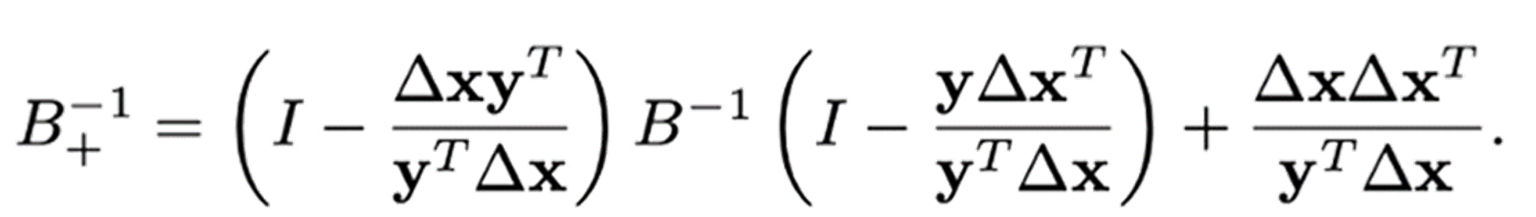

# This is approximated Hessian 

In [37]:
# BFGS
def Bfgs(x0 , x1 , f_dash,b0):

    delta_x = x1 - x0
    
    y = f_dash(x1) - f_dash(x0)
    
    b_1 = (np.identity(2) -  (delta_x @ y.T)/(y.T @ delta_x)) @ b0 @ (np.identity(2) - (y @ delta_x.T)/(y.T @ delta_x)) + ((delta_x @ delta_x.T)/(y.T @ delta_x))
    return b_1
    
        

In [40]:
def minimize_BFGS(x0 , x1 ,Bfgs, f_dash,e):
    b0 = np.identity(2)
    b_1 = Bfgs(x0 , x1 , f_dash,b0)
    i = 1
    while True:
        print(f"B_inv = {b_1}")
        print(f"x_n-1 : \n{x0}")
        print(f"x_n : \n{x1}")
        x_new = x1 - b_1 @ f_dash(x1)
        x0 = x1
        x1 = x_new
        b0 = b_1
        b_1 = Bfgs(x0,x1,f_dash,b0)
        print("***************")
        if np.linalg.norm((f_dash(x_new)))< e:
            
            print(f"x_n-1 : \n{x0}")
            print(f"x_n : \n{x1}")
            print(f"Df(x_n-1)= {f_dash(x0)}")
            print(f"Df(x_n)= {f_dash(x1)}")
            print(f"Solution found after {i} iteration")
            print(f"x_final={x_new}")
            print(f"Df(x_final)= {f_dash(x_new)}")
            print(np.linalg.norm((f_dash(x_new))))
            break

In [41]:
#First Function 
f = lambda x,y: x**2 + y**2
Df = lambda x: np.array([2*x[0],2*x[1]])
x0 = np.array([[10],[10]])
x1 = np.array([[9],[9]])
minimize_BFGS(x0,x1,Bfgs,Df,0.001)

B_inv = [[ 0.75 -0.25]
 [-0.25  0.75]]
x_n-1 : 
[[10]
 [10]]
x_n : 
[[9]
 [9]]
***************
x_n-1 : 
[[9]
 [9]]
x_n : 
[[0.]
 [0.]]
Df(x_n-1)= [[18]
 [18]]
Df(x_n)= [[0.]
 [0.]]
Solution found after 1 iteration
x_final=[[0.]
 [0.]]
Df(x_final)= [[0.]
 [0.]]
0.0


# Second Function with learning Rate

In [43]:
# Second function
f = lambda x,y: x**2 + x * y + y**2
Df = lambda x: np.array([2*x[0] + x[1] ,2*x[1]+x[0]])

DDf =  np.array([
    [2,1],[1,2]
])

In [48]:
def minimize_BFGS_lr(x0 , x1 ,Bfgs, f_dash,e,lr):
    
    b0 = np.identity(2)
    b_1 = Bfgs(x0 , x1 , f_dash,b0)
    i = 1
    while True:
        print(f"B_inv = {b_1}")
        print(f"x_n-1 : \n{x0}")
        print(f"x_n : \n{x1}")
        print(f"Df(x_n-1)= {f_dash(x0)}")
        print(f"Df(x_n)= {f_dash(x1)}")
        x_new = x1 - lr * b_1 @ f_dash(x1)
        x0 = x1
        x1 = x_new
        b0 = b_1
        b_1 = Bfgs(x0,x1,f_dash,b0)
        i+=1
        print("***************")
        if np.linalg.norm((f_dash(x_new)))< e:
            
            print(f"x_n-1 : \n{x0}")
            print(f"x_n : \n{x1}")
            print(f"Df(x_n-1)= {f_dash(x0)}")
            print(f"Df(x_n)= {f_dash(x1)}")
            print(f"Solution found after {i} iteration")
            print(f"x_final={x_new}")
            print(f"Df(x_final)= {f_dash(x_new)}")
            print(np.linalg.norm((f_dash(x_new))))
            break

In [49]:
minimize_BFGS_lr(x0,x1,Bfgs,Df,0.001,0.8)

B_inv = [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
x_n-1 : 
[[10]
 [10]]
x_n : 
[[9]
 [9]]
Df(x_n-1)= [[30]
 [30]]
Df(x_n)= [[27]
 [27]]
***************
B_inv = [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
x_n-1 : 
[[9]
 [9]]
x_n : 
[[1.8]
 [1.8]]
Df(x_n-1)= [[27]
 [27]]
Df(x_n)= [[5.4]
 [5.4]]
***************
B_inv = [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
x_n-1 : 
[[1.8]
 [1.8]]
x_n : 
[[0.36]
 [0.36]]
Df(x_n-1)= [[5.4]
 [5.4]]
Df(x_n)= [[1.08]
 [1.08]]
***************
B_inv = [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
x_n-1 : 
[[0.36]
 [0.36]]
x_n : 
[[0.072]
 [0.072]]
Df(x_n-1)= [[1.08]
 [1.08]]
Df(x_n)= [[0.216]
 [0.216]]
***************
B_inv = [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
x_n-1 : 
[[0.072]
 [0.072]]
x_n : 
[[0.0144]
 [0.0144]]
Df(x_n-1)= [[0.216]
 [0.216]]
Df(x_n)= [[0.0432]
 [0.0432]]
***************
B_inv = [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
x_n-1 : 
[[0.0144]
 [0.0144]]
x_n : 
[[0.0

# Done